<a href="https://colab.research.google.com/github/KodumuruRaja/Dimensionality-Reduction-Algorithms/blob/main/Gaussian%5CMixture%20Discriminant%20Analysis(LDA%2BQDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


class GaussianDiscriminantAnalysis:
    def __init__(self):
        pass

    def initialize_data(self, X_, y_):
        self.n_features_ = X_.shape[1]

        self.classes_ = np.unique(y_)
        self.classes_.sort()

        self.means_ = np.zeros((self.classes_.size, self.n_features_))
        self.priors_ = np.zeros(self.classes_.size)

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

    def proba_score(self, X, mean, prior):
        pass

    def get_values(self, data):
        if (isinstance(data, pd.DataFrame) or isinstance(data, pd.Series)):
            return data.values
        return data


class LinearDiscriminantAnalysis(GaussianDiscriminantAnalysis):
    def fit(self, X, y):
        X_ = self.get_values(X)
        y_ = self.get_values(y)

        self.initialize_data(X_, y_)

        for index, y_class in enumerate(self.classes_):
            self.means_[index] = np.mean(X_[y_ == y_class], axis=0)
            self.priors_[index] = y_[y_ == y_class].size / y_.size

        self.cov_matrix_ = self.calc_single_covariance(X_, y_)
        self.cov_matrix_det_ = np.sqrt(np.linalg.det(self.cov_matrix_))
        self.cov_matrix_inv = np.linalg.pinv(self.cov_matrix_)

    def predict(self, X):
        X_ = self.get_values(X)
        probs = np.zeros((X_.shape[0], self.priors_.size))
        for index, _ in enumerate(self.classes_):
            probs[:, index] = self.proba_score(
                X_, self.means_[index], self.priors_[index])

        probs_arg_max = np.argmax(probs, axis=1)
        return probs_arg_max

    def proba_score(self, X, mean, prior):
        Xm = X - mean
        Xm_cov = (Xm @ self.cov_matrix_inv) * Xm
        Xm_cov_sum = Xm_cov.sum(axis=1)
        return -0.5*Xm_cov_sum + np.log(prior)

    def calc_single_covariance(self, X, y):
        cov = np.zeros(shape=(X.shape[1], X.shape[1]))
        for i, y_class in enumerate(np.unique(y)):
            X_class_members = X[y == y_class]
            cov += (X_class_members -
                    self.means_[i]).T @ (X_class_members - self.means_[i])

        cov /= X.shape[0]
        return cov


class QuadraticDiscriminantAnalysis(GaussianDiscriminantAnalysis):
    def fit(self, X, y):
        X_ = self.get_values(X)
        y_ = self.get_values(y)

        self.initialize_data(X_, y_)

        self.cov_matrices_ = np.zeros(
            (self.classes_.size, self.n_features_, self.n_features_))
        for index, y_class in enumerate(self.classes_):
            has_y_class = (y_ == y_class)
            self.means_[index] = np.mean(X_[has_y_class], axis=0)
            self.priors_[index] = y_[has_y_class].size / y_.size
            self.cov_matrices_[index] = self.calc_class_covariance(
                X_[has_y_class], self.means_[index])

    def predict(self, X):
        X_ = self.get_values(X)
        probs = np.zeros((X_.shape[0], self.priors_.size))
        for index, _ in enumerate(self.classes_):
            probs[:, index] = self.proba_score(X_, self.means_[index], self.priors_[
                                               index], self.cov_matrices_[index])
        probs_arg_max = np.argmax(probs, axis=1)
        return probs_arg_max

    def proba_score(self, X, mean, prior, cov_matrix):
        cov_matrix_det = np.linalg.det(cov_matrix)
        cov_matrix_inv = np.linalg.pinv(cov_matrix)

        Xm = X - mean
        Xm_cov = (Xm @ cov_matrix_inv) * Xm
        Xm_cov_sum = Xm_cov.sum(axis=1)
        return -0.5*Xm_cov_sum - 0.5*np.log(cov_matrix_det) + np.log(prior)

    def calc_class_covariance(self, X_members_i, mean_i):
        if (X_members_i.shape[0] == 0):
            return np.zeros((X_members_i.shape[1], X_members_i.shape[1]))
        return (X_members_i - mean_i).T @ (X_members_i - mean_i) / X_members_i.shape[0]

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def train_test_split(X, ratio):
    X_shuffled = np.copy(X)
    np.random.shuffle(X_shuffled)
    return X_shuffled[:int(len(X_shuffled) * ratio)], X_shuffled[int(len(X_shuffled) * ratio):]

In [ ]:
df = pd.read_csv("/content/chronic_kidney_disease.csv", header = None, error_bad_lines=False)
df.columns = [
    'age',
    'bp',
    'sp',
    'al',
    'su',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'bgr',
    'bu',
    'sc',
    'sod',
    'pot',
    'hemo',
    'pcv',
    'wc',
    'rc',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
    'class'
]

b'Skipping line 70: expected 25 fields, saw 26\nSkipping line 73: expected 25 fields, saw 26\nSkipping line 370: expected 25 fields, saw 26\n'


In [ ]:
df

,age,bp,sp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1.0,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.replace({'?': np.nan}, inplace=True)
df.dropna(inplace=True)
df

,age,bp,sp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68,80,1.010,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1.0,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df['age'] = df['age'].astype('int')
df['bp'] = df['bp'].astype('int')
df['pcv'] = df['pcv'].astype('int')
df['wc'] = df['wc'].astype('int')
df['rc'] = df['rc'].astype('float')

df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes

In [ ]:
df.describe()

,age,bp,pcv,wc,rc,class
count,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000
mean,49.401274,74.076433,41.891720,8464.33121,4.892357,0.726115
std,15.427190,11.206421,9.128414,3133.46316,1.022600,0.447378
min,6.000000,50.000000,9.000000,3800.00000,2.100000,0.000000
25%,39.000000,60.000000,37.000000,6500.00000,4.500000,0.000000
50%,50.000000,80.000000,44.000000,7800.00000,5.000000,1.000000
75%,60.000000,80.000000,48.000000,9700.00000,5.600000,1.000000
max,83.000000,110.000000,54.000000,26400.00000,8.000000,1.000000


In [ ]:
df.corr()

,age,bp,pcv,wc,rc,class
age,1.000000,0.084286,-0.242078,0.148446,-0.243401,-0.314621
bp,0.084286,1.000000,-0.352838,0.009644,-0.228845,-0.325676
pcv,-0.242078,-0.352838,1.000000,-0.351894,0.739774,0.827751
wc,0.148446,0.009644,-0.351894,1.000000,-0.272358,-0.410786
rc,-0.243401,-0.228845,0.739774,-0.272358,1.000000,0.721208
class,-0.314621,-0.325676,0.827751,-0.410786,0.721208,1.000000


In [ ]:
data = df[['age', 'wc', 'rc', 'class']].values

In [ ]:
train_data, test_data = train_test_split(data, ratio=0.8)

X_train = train_data[:, :3]
y_train = train_data[:, -1]

X_test = test_data[:, :3]
y_test = test_data[:, -1]

In [ ]:
model_linear = LinearDiscriminantAnalysis()
model_linear.fit(X_train, y_train)

In [ ]:
y_pred = model_linear.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
y_test[y_test==0].size, y_pred[y_pred == 0].size

(10, 9)

In [ ]:
y_test[y_test==1].size, y_pred[y_pred == 1].size

(22, 23)

In [ ]:
y_test[y_test == y_pred].size / y_test.size

0.96875

In [ ]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, y_train)

In [ ]:
y_pred = model_quad.predict(X_test)

In [ ]:

y_test[y_test==0].size, y_pred[y_pred == 0].size

(10, 10)

In [ ]:
y_test[y_test==1].size, y_pred[y_pred == 1].size

(22, 22)

In [ ]:
y_test[y_test == y_pred].size / y_test.size

1.0

In [ ]:
df_exam = pd.read_excel("/content/exam_data_.xls")
df_exam

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [ ]:
df_exam.columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']

In [ ]:
df_exam['UNS'] = df_exam['UNS'].astype('category')
df_exam['UNS'] = df_exam['UNS'].cat.codes

In [ ]:
df_exam.corr()

,STG,SCG,STR,LPR,PEG,UNS
STG,1.000000,0.081035,0.040841,0.099543,0.206359,-0.074570
SCG,0.081035,1.000000,0.083732,0.097816,0.182792,-0.210050
STR,0.040841,0.083732,1.000000,0.036481,0.120779,-0.060510
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574,-0.263670
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000,-0.488249
UNS,-0.074570,-0.210050,-0.060510,-0.263670,-0.488249,1.000000


In [ ]:
data = df_exam[['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']].values

train_data, test_data = train_test_split(data, ratio=0.8)

X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/us

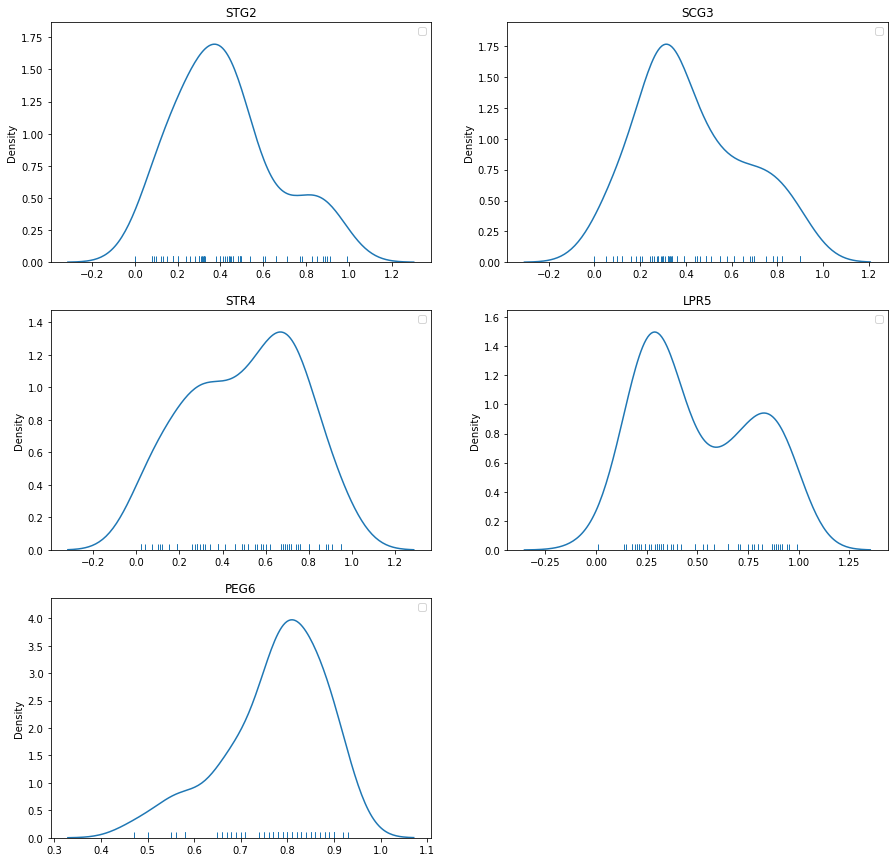

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/us

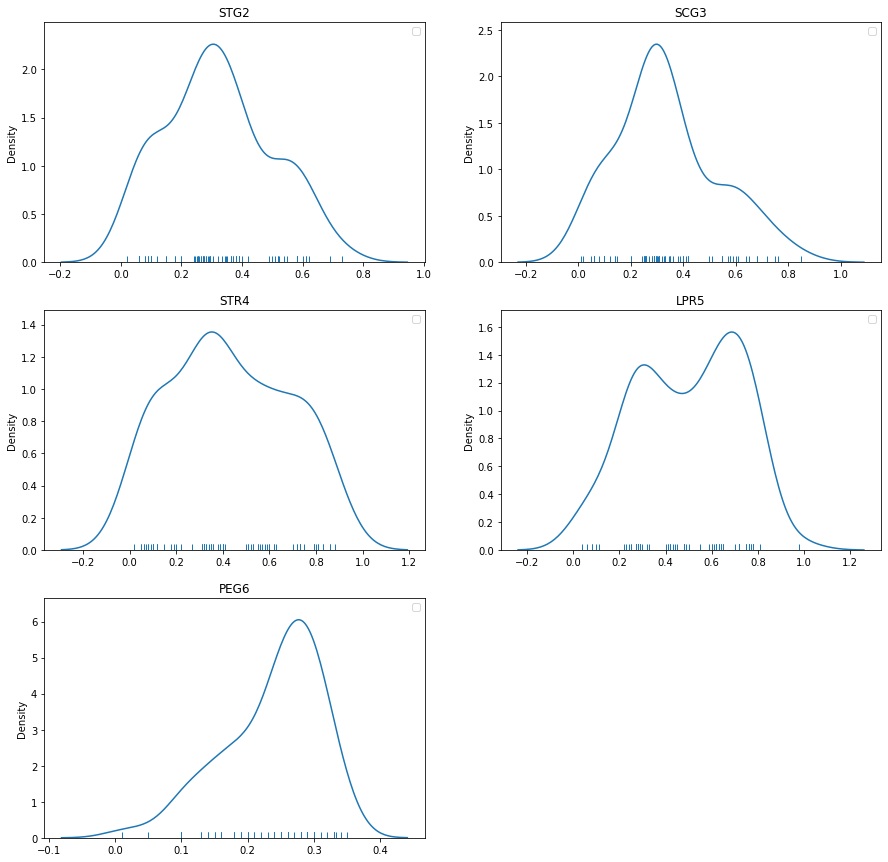

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/us

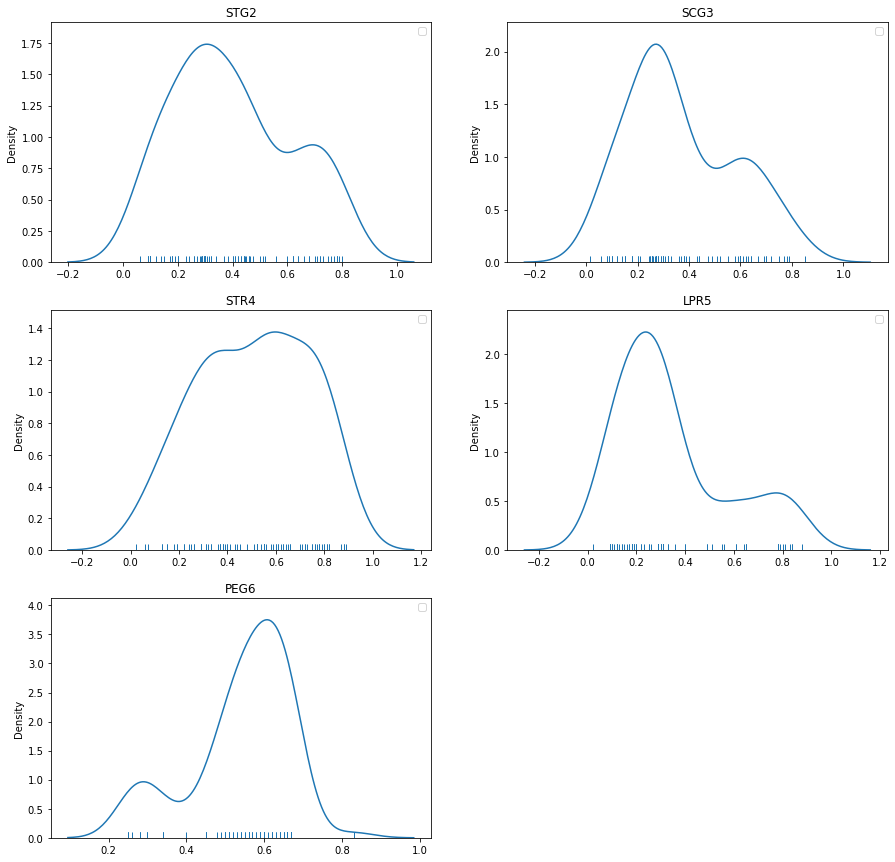

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/us

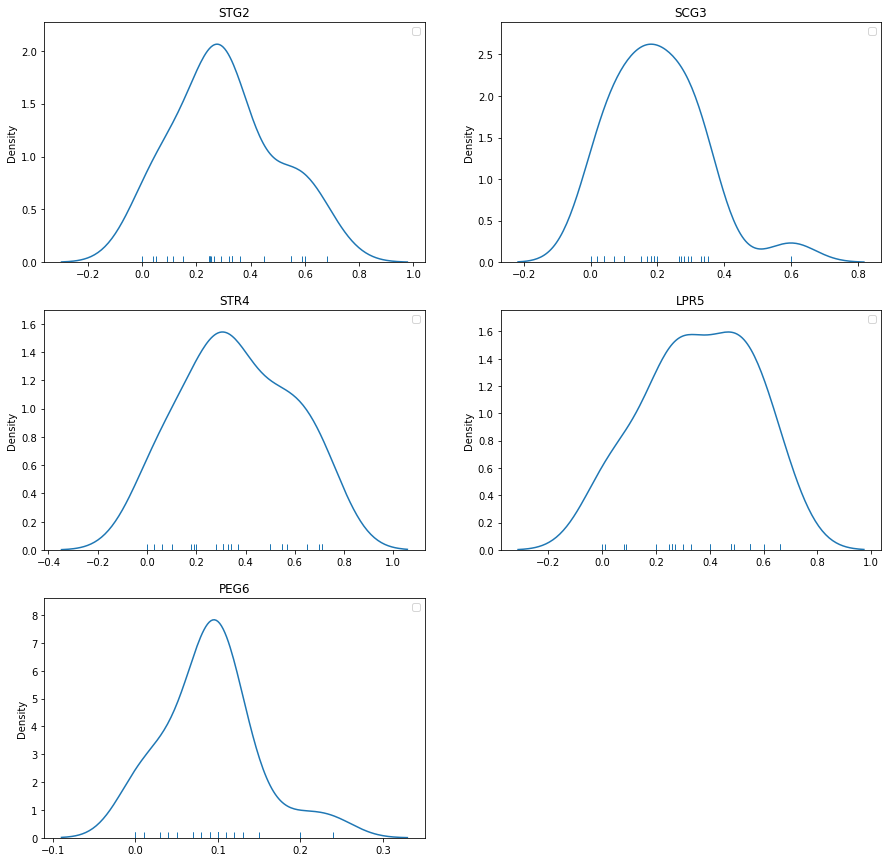

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pxydf = {}
pxydf[3] = df_exam[df_exam['UNS'] == 3]
del pxydf[3]['UNS']
pxydf[2] = df_exam[df_exam['UNS']== 2]
del pxydf[2]['UNS']
pxydf[1] = df_exam[df_exam['UNS']== 1]
del pxydf[1]['UNS']
pxydf[0] = df_exam[df_exam['UNS']== 0]
del pxydf[0]['UNS']

for j in range(len(pxydf)): 
    i=1
    fig = plt.figure(figsize=(15,15))
    for columns in pxydf[i].columns:
        fig.add_subplot(3,2,i)
        i = i+1
        fig.set_figheight(15)
        fig.set_figwidth(15)
        sns.distplot(pxydf[j][[columns]], hist=False, rug=True)
        plt.title(columns+str(i))
        plt.legend()
    plt.show()

In [ ]:
model_exam = LinearDiscriminantAnalysis()
model_exam.fit(X_train, y_train)

In [ ]:
y_pred = model_exam.predict(X_test)

In [ ]:
y_test[y_pred == y_test].size / y_test.size

0.9038461538461539

In [ ]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, y_train)

In [ ]:
y_pred = model_quad.predict(X_test)

In [ ]:
y_test[y_test == y_pred].size / y_test.size

0.8653846153846154